# KNN算法

寻找k个与之最近的点进行投票, 然后给出结论

### 自己手动实现一个knn算法

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# 数据
# 特征
raw_data_x= [[3.393533211,2.331273381],
             [2.110073483,1.781539638],
             [1.343808831,3.368360954],
             [3.582294042,4.679179110],
             [2.280362439,2.866990263],
             [7.423436942,4.696522875],
             [5.745051997,3.533989803],
             [9.172168622,2.511101045],
             [7.792783481,3.424088941],
             [7.939820817,0.791637231]
            ]
# 所属类别
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [12]:
# 要预测的数据
x = np.array([8.09121212,3.3545454545])

- 将数据转化成机器学习的数据格式（numpy格式）

In [10]:
X_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

- 可视化一个数据

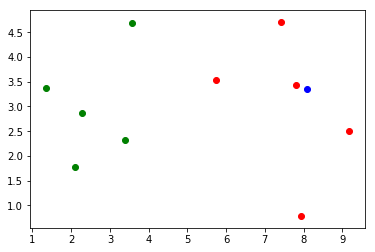

In [13]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0],x[1], color='b')
plt.show()

- knn的具体实现 k= 6

In [29]:
distances = []
from math import sqrt
for x_train in X_train[y_train==0]:
    distances.append([sqrt(np.sum((x_train - x)**2)), 0])
for x_train in X_train[y_train==1]:
    distances.append([sqrt(np.sum((x_train - x)**2)), 1])
distances

[[4.807834530063241, 0],
 [6.184526392033351, 0],
 [6.747417432798599, 0],
 [4.699467688515211, 0],
 [5.83126779353653, 0],
 [1.4989419886989506, 1],
 [2.3530124515106086, 1],
 [1.3710818469853936, 1],
 [0.30642445902696464, 1],
 [2.5673756812566335, 1]]

In [36]:
result = sorted(distances, key = lambda x:x[0])
result

[[0.30642445902696464, 1],
 [1.3710818469853936, 1],
 [1.4989419886989506, 1],
 [2.3530124515106086, 1],
 [2.5673756812566335, 1],
 [4.699467688515211, 0],
 [4.807834530063241, 0],
 [5.83126779353653, 0],
 [6.184526392033351, 0],
 [6.747417432798599, 0]]

In [38]:
zero_num = 0
one_num = 0 
for i in range(6):
    a = result[i]
    if a[1] ==0:
        zero_num += 1
    else:
        one_num += 1

In [39]:
zero_num

1

In [40]:
one_num

5

In [42]:
from math import sqrt
distances = []
for x_train in X_train:
    distances.append(sqrt(np.sum((x_train - x)**2)))
distances

[4.807834530063241,
 6.184526392033351,
 6.747417432798599,
 4.699467688515211,
 5.83126779353653,
 1.4989419886989506,
 2.3530124515106086,
 1.3710818469853936,
 0.30642445902696464,
 2.5673756812566335]

In [48]:
# 列表推导式进行简化
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
distances

[4.807834530063241,
 6.184526392033351,
 6.747417432798599,
 4.699467688515211,
 5.83126779353653,
 1.4989419886989506,
 2.3530124515106086,
 1.3710818469853936,
 0.30642445902696464,
 2.5673756812566335]

In [50]:
# 返回排序后的索引值, 
nearst =np.argsort(distances)

In [56]:
k = 6
topk_y = [y_train[i] for i in nearst[:k]]
topk_y

[1, 1, 1, 1, 1, 0]

In [61]:
# 使用python里面的collections Counter 类进行统计
from collections import Counter
votes = Counter(topk_y)
votes

Counter({1: 5, 0: 1})

In [63]:
votes.most_common(1)

[(1, 5)]

In [67]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

### 将KNN算法封装成函数

In [87]:
def kNN_classify(k, X_train, y_train, x):
    """对传入的参数进行断言判断"""
    assert 1 <= k <= X_train.shape[0], "k must be valid"
    assert X_train.shape[0] == y_train.shape[0],"the size of X_train must be equal to the size of y_train"
    assert X_train.shape[1] == x.shape[0], 'the feature number x must be equal to X_train'
    distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
    # 返回排序后的索引值, 
    nearst =np.argsort(distances)
    topk_y = [y_train[i] for i in nearst[:k]]
    from collections import Counter
    votes = Counter(topk_y)
    return votes.most_common(1)[0][0]

In [72]:
# def test(x):
#     assert 1 < x < 10,"x 必须在1 ~10之间"
# test(100)

In [88]:
predict = kNN_classify(6,X_train, y_train, x)
predict

1